## Estadística Aplicada

Pronóstico IMCMI SA para Agosto 2023

Nombre: David Eduardo Gómez Marín    -    Matrícula: 1914352

Gpo 41

In [110]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:

##Especializadas
#Librerías especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_predict

#estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

##
import pmdarima as pm

1. Descargar la base de datos con base en el video adjunto, se debe elegir un 
periodo y en la notebook se debe justificar el periodo elegido.

In [112]:
Indicador = pd.read_excel('Indicadores20231031233539.xls', index_col='Periodos', parse_dates=True)

C:\Users\Gamer User\AppData\Local\Temp\ipykernel_15616\515303233.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Indicador = pd.read_excel('Indicadores20231031233539.xls', index_col='Periodos', parse_dates=True)


In [113]:
Indicador.head()

,IMCMI_SA
Periodos,
1993-01-01,52.535712
1993-02-01,53.260021
1993-03-01,53.921865
1993-04-01,53.102741
1993-05-01,54.042567


# Justificación de periodo
Se eligió el periodo desde el año 1993 (Año mas antiguo) hasta el mes mas reciente del año actual, esto con el fin de obtener mayor información del pasado para poder pronosticar el futuro de manera más precisa

2. Verificar tipo de variables y no existencia de missing values

In [114]:
Indicador.dtypes

IMCMI_SA    float64
dtype: object

In [115]:
Indicador = Indicador.asfreq('MS')

In [116]:
Indicador.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='Periodos', length=367, freq='MS')

In [117]:
Indicador.isnull().sum()

IMCMI_SA    0
dtype: int64

Los datos del index son tipo fecha. Los datos del indicador IMCMI_SA son de tipo float. No hay missing values

3. Gráfico de la serie (títulos, nombre a ejes etc)


Text(0, 0.5, 'IMCMI')

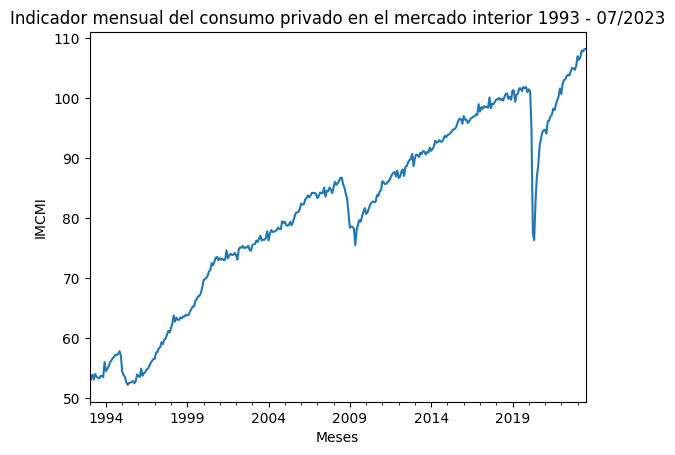

In [118]:
Indicador['IMCMI_SA'].plot()
plt.title('Indicador mensual del consumo privado en el mercado interior 1993 - 07/2023')
plt.xlabel('Meses')
plt.ylabel('IMCMI')

De principio, gráficamente no parece una serie estacionaria, por lo que realizaremos una prueba de raíz unitaria para verificar este dato.

4. Realiza un pronóstico del índice:

a) Realiza una prueba de raíz unitaria a la serie original

b) En caso de que no sea estacionaria aplica primeras diferencias, y realiza 
la prueba de raíz unitaria para verificar que la serie sea estacionaria

c) Si la serie no es estacionaria repite el paso b hasta que la serie sea 
estacionaria.

In [119]:
prueba_adf = adfuller(Indicador['IMCMI_SA'])
pvalue = prueba_adf[1]
pvalue.round(3)

0.803

No rechazamos H0, por lo que el indicador IMCMI_SA no es una serie estacionaria, por lo que no se puede pronosticar.

In [120]:
#Realizar primeras diferencias
Indicador['1stDiff'] = Indicador['IMCMI_SA'].diff()

Text(0, 0.5, 'Primeras diferencias IMCMI')

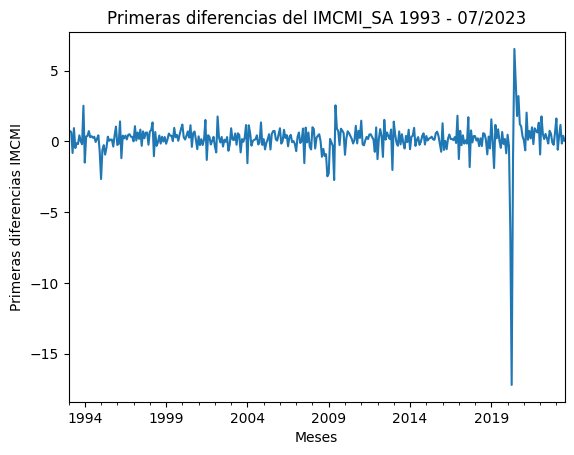

In [121]:
Indicador['1stDiff'].plot()
plt.title('Primeras diferencias del IMCMI_SA 1993 - 07/2023')
plt.xlabel('Meses')
plt.ylabel('Primeras diferencias IMCMI')

Parece ser una serie estacionaria excepto por los altibajos despues del año 2019, verificaremos este dato con prueba de raíz unitaria

In [122]:
prueba_adf1 = adfuller(Indicador['1stDiff'].dropna())
pvalue1 = prueba_adf1[1]
pvalue1.round(3)

0.0

Rechazamos H0, por lo que las primeras diferencias del indicador IMCMI_SA son una serie estacionaria y por lo tanto se pueden pronosticar.

d) Realiza las graficas de autocorrelación de la serie estacionaria para 
verificar si la serie tiene o no un componente estacional

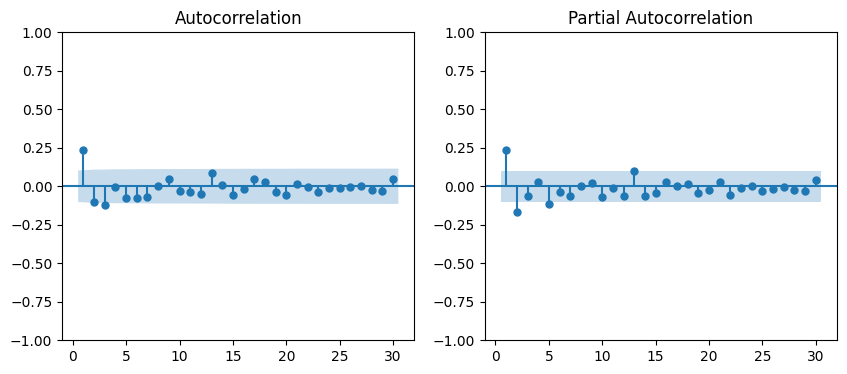

In [123]:
#Graficas de correlacion para ver si tienen componente estacional
ig, ax = plt.subplots(1,2,figsize=(10,4))

#1er
plot_acf(Indicador['1stDiff'].dropna(), zero=False, lags=30, ax=ax[0]);

#2da
plot_pacf(Indicador['1stDiff'].dropna(), zero=False, lags=30, ax=ax[1]);

Como no vemos ningún patron de picos que se repitan en ambas graficas, podríamos decir que no tiene componente estacional. Además, como todos los puntos de las lineas se encuenran dentro del área sombreada, pues estadísticamente valen cero, por lo que al no tener valores fuera de esta area sombreada, no hay patrones que se repitan y no tiene componente estacional.

e) Utiliza auto_arima para encontrar el orden del modelo arima, dando el 
parámetro information_criterion, prueba y muestra el resultado, con aic, 
bic, hqic, oob.

In [124]:
#Determinar el orden del proceso usando autoarima

arimaOrder_aic = pm.auto_arima(Indicador['IMCMI_SA'],
                               start_p=1, start_q=1,
                               max_p=7, max_q=7,
                               information_criterion='aic') 

arimaOrder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)>

In [125]:
#Determinar el orden del proceso usando autoarima

arimaOrder_aic = pm.auto_arima(Indicador['IMCMI_SA'],
                               start_p=1, start_q=1,
                               max_p=7, max_q=7,
                               information_criterion='bic') 

arimaOrder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [126]:
#Determinar el orden del proceso usando autoarima

arimaOrder_aic = pm.auto_arima(Indicador['IMCMI_SA'],
                               start_p=1, start_q=1,
                               max_p=7, max_q=7,
                               information_criterion='hqic') 

arimaOrder_aic.params

<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)>

In [127]:
#Determinar el orden del proceso usando autoarima

arimaOrder_aic = pm.auto_arima(Indicador['IMCMI_SA'],
                               start_p=1, start_q=1,
                               max_p=7, max_q=7,
                               information_criterion='oob') 

arimaOrder_aic.params

c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\pmdarima\arima\_validation.py:35: UserWarning: information_criterion cannot be 'oob' with out_of_sample_size = 0. Falling back to information criterion = aic.
  warnings.warn('information_criterion cannot be \'oob\' with '


<bound method ARIMA.params of ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)>

f) Utilizar el método del if con AR y MA para ver que modelos sugieren el 
BIC y el AIC

In [128]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(Indicador['IMCMI_SA'], order=(ar, 1, ma)) #¿Sería lo mismo poner Indicador['1stDiff].dropna(), order=(ar,0,ma)?
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 0, MA: 5
AR: 0, MA: 6
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 1, MA: 5
AR: 1, MA: 6
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 2, MA: 5
AR: 2, MA: 6
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 3
AR: 3, MA: 4


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 5
AR: 3, MA: 6


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 3


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 4
AR: 4, MA: 5


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters f

AR: 4, MA: 6


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3
AR: 5, MA: 4


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2
AR: 6, MA: 3


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 4


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 6


c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [132]:
ic.sort_values('AIC').head(15)

,,AIC,BIC
AR,MA,,
4,2,1186.577961,1213.896395
3,4,1191.003186,1222.224253
0,3,1192.586260,1208.196793
1,3,1193.760220,1213.273387
2,0,1194.232781,1205.940681
0,4,1194.381488,1213.894655
2,2,1194.755663,1214.268830
5,0,1194.830586,1218.246386
0,5,1194.909112,1218.324912


In [130]:
ic.sort_values('BIC').head()

,,AIC,BIC
AR,MA,,
0,1,1196.089478,1203.894745
2,0,1194.232781,1205.940681
0,3,1192.586260,1208.196793
1,0,1201.199117,1209.004383
0,2,1197.936567,1209.644467


AIC

* IMCMI_SA es una ARMA(4,2) = ARIMA(4,1,2)
* 1stDiff ARIMA (4,0,2)

BIC

* IMCMI_SA es una ARMA(0,1) = ARIMA(0,1,1)
* 1stDiff ARIMA (0,0,1)

g) Con los dos incisos anteriores elegir el orden ARIMA a estimar

Elegimos ARIMA(4,1,2)

h) Estimar el modelo


In [133]:
model = ARIMA(Indicador['IMCMI_SA'], order=(4,1,2))
results = model.fit()
print(results.summary())

c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               IMCMI_SA   No. Observations:                  367
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -586.289
Date:                Wed, 01 Nov 2023   AIC                           1186.578
Time:                        01:38:46   BIC                           1213.896
Sample:                    01-01-1993   HQIC                          1197.434
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4784      0.033    -44.218      0.000      -1.544      -1.413
ar.L2         -0.5947      0.049    -12.184      0.000      -0.690      -0.499
ar.L3         -0.0347      0.042     -0.835      0.4

c:\Users\Gamer User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


i) Pronosticar tres periodos

In [136]:
forecast = results.get_forecast(steps=4)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [137]:
Indicador.tail()

,IMCMI_SA,1stDiff
Periodos,,
2023-03-01,106.762443,0.361856
2023-04-01,107.928291,1.165848
2023-05-01,107.775653,-0.152638
2023-06-01,108.168118,0.392465
2023-07-01,108.209387,0.041269


In [138]:
inicio = '2023-08-01'
fin = '2023-10-01'

In [139]:
pronostico_valor = forecast_mean[inicio:fin]
pronostico_intervalos = forecast_ci.loc[inicio:fin]

In [140]:
df_forecast = pd.DataFrame({
    'pronostico': pronostico_valor,
    'limite inf': pronostico_intervalos['lower IMCMI_SA'],
    'limite sup': pronostico_intervalos['upper IMCMI_SA']
})

In [141]:
df_forecast

,pronostico,limite inf,limite sup
2023-08-01,108.614553,106.277770,110.951337
2023-09-01,108.316469,104.449848,112.183089
2023-10-01,108.449751,103.608449,113.291052


j) Mostrar en un print el pronóstico para agosto de 2023 con sus intervalos 
de confianza al 95%

In [142]:
print(f'pronosticamos que el mes de agosto 2023, el IMCMI_SA tendrá el valor de {df_forecast.iloc[0,0].round(2)}\n pero puede estar entre {df_forecast.iloc[0,1].round(2)} y {df_forecast.iloc[0,2].round(2)}')

pronosticamos que el mes de agosto 2023, el IMCMI_SA tendrá el valor de 108.61
 pero puede estar entre 106.28 y 110.95
